# Enunciado

Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web. El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web. 

Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

# Se pide

Tareas que nos pide la empresa: 

1. Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio. 

2. Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a. 

3. Tratamiento de variables categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan. 

4. Si existe alguna variable que se necesite borrar, habrá que borrarla y justificarlo. 

5. Estandarizar los datos. 

6. Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch. 

    - Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc. 

    - Utilizar un modelo de redes neuronales. 

    - Utilizar cualquier otro modelo de clasificación.


7. Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo. 

8. Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada. 

9. Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC. 


El entregable final será un Jupyter Notebook en el que se realicen todos los análisis y los modelos.

# Notas

Lo que se pide es un modelo end-to-end como los vistos en prácticas en el módulo. En este caso, hay que aplicar tres modelos y escoger el mejor, pero la parte previa es común a los tres. 

Se tendrán en cuenta la estructura del código, las interpretaciones y las justificaciones. 

El esquema que se pone en las tareas es un esquema general. Si se necesita hacer alguna tarea, se puede llevar a cabo. También es posible aplicar cualquier otro algoritmo visto en el módulo, siempre justificando y haciendo las cosas con un sentido.

# Información de los datos

El conjunto de datos consta de diez atributos numéricos y ocho categóricos. 

- El atributo **revenue** puede ser usado como la etiqueta de la clase. 

- **Administrative**, **administrative duration**, **informational**, **informational duration**, **product related** y **product related duration** representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra. 

- Las características **bounce rate**, **exit rate** y **page value** representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico. El valor de la característica **bounce rate** de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la característica **exit rate** para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión. La función **Page Value** representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico. 

- La característica de **special day** indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. 

- El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año. 


Los datos se han obtenido de la siguiente web, aunque se pueden descargar de la plataforma de IMF Business School: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset 

# Solución

## 0. Configuración del entorno y lectura del fichero

In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn
import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics as metrics

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.ensemble import RandomForestClassifier

In [2]:
dataFrame = pandas.read_csv('online_shoppers_intention.csv')

## 1. Análisis de las variables

## 1.1. Descripción general de los datos

En primer lugar, procedemos a realizar una exploración general de los datos.

In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
print(u'El número de filas en el dataset es: {}'.format(dataFrame.shape[0]))
print('')
print(u'El número de columnas en el dataset es: {}'.format(dataFrame.shape[1]))

El número de filas en el dataset es: 12330

El número de columnas en el dataset es: 18


In [5]:
print('Los nombres de las variables son:')
print('')

variables_list=[]
for variables in dataFrame.columns:
    print(variables)

# También se puede hacer de la siguiente manera:
# print('Los nombres de las variables son: \n {}'.format(list(dataFrame.columns)))

Los nombres de las variables son:

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues
SpecialDay
Month
OperatingSystems
Browser
Region
TrafficType
VisitorType
Weekend
Revenue


In [6]:
print('Tipo de datos de cada variable:')
dataFrame.dtypes

Tipo de datos de cada variable:


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
print('Primeras 5 líneas del dataframe:')
dataFrame.head()

Primeras 5 líneas del dataframe:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
print('Últimas 5 líneas del dataframe:')
dataFrame.tail()

Últimas 5 líneas del dataframe:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## 1.2. Análisis univariante

### - Variables numéricas

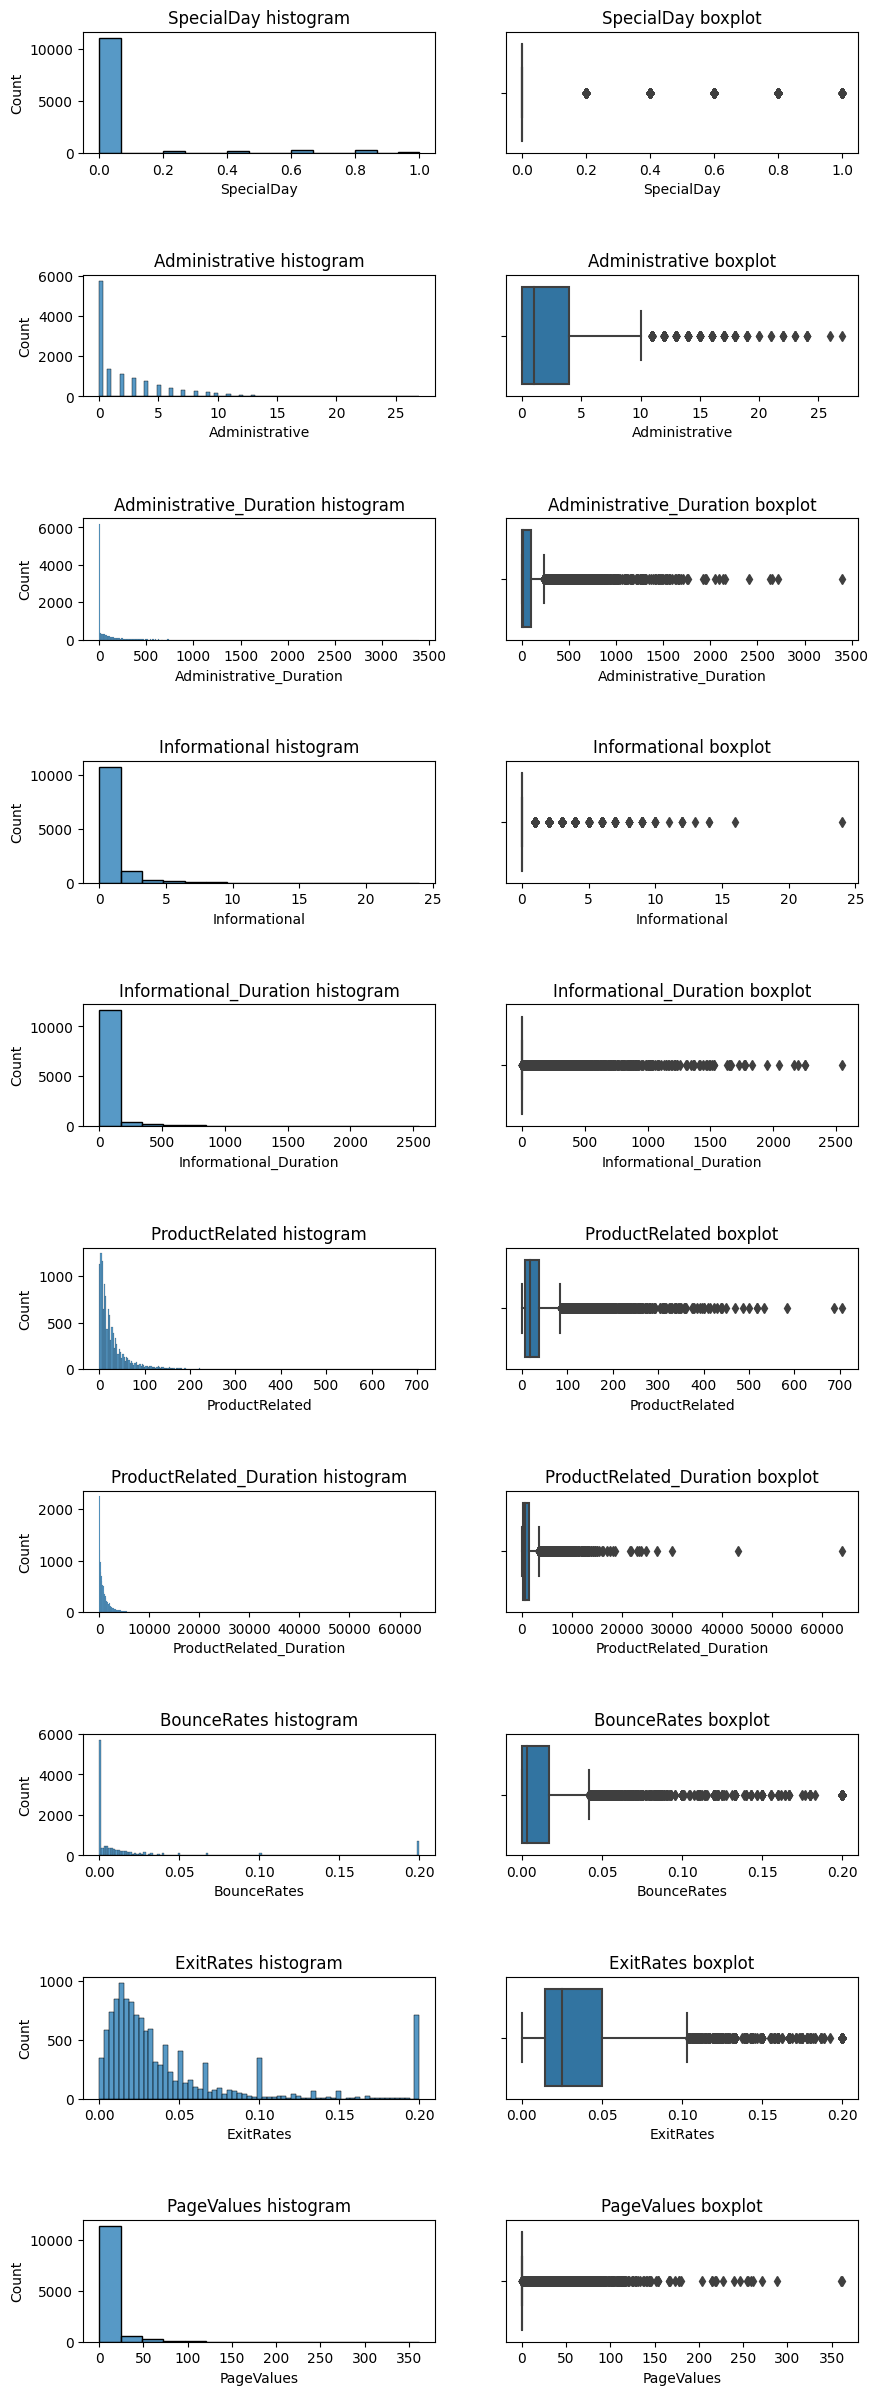

In [9]:
numerical_variables=['SpecialDay',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

x=1
pyplot.figure(figsize=(10, 30))
for numerical_variable in numerical_variables:
    seaborn.histplot(data=dataFrame,x=numerical_variable,ax=pyplot.subplot(10,2,x))
    pyplot.title(numerical_variable + ' histogram')
    x+=1

    seaborn.boxplot(data=dataFrame,x=numerical_variable,ax=pyplot.subplot(10,2,x))
    pyplot.title(numerical_variable + ' boxplot')
    x+=1

pyplot.subplots_adjust(hspace=1)

pyplot.show()

### - Variables categóricas

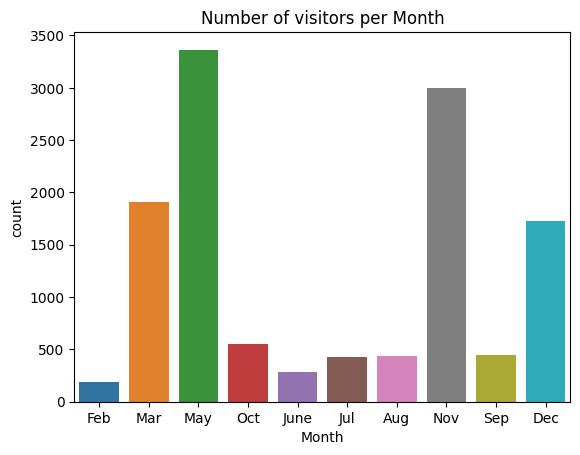

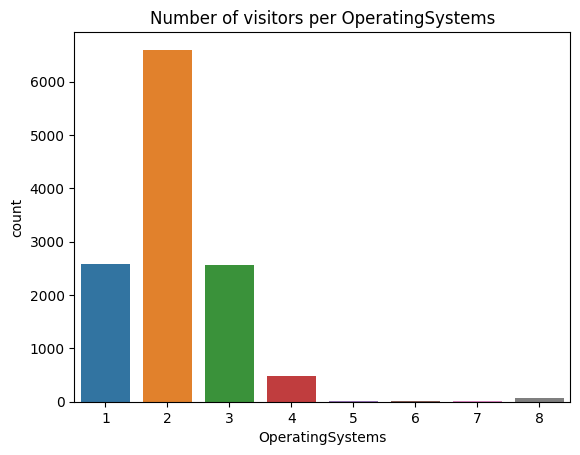

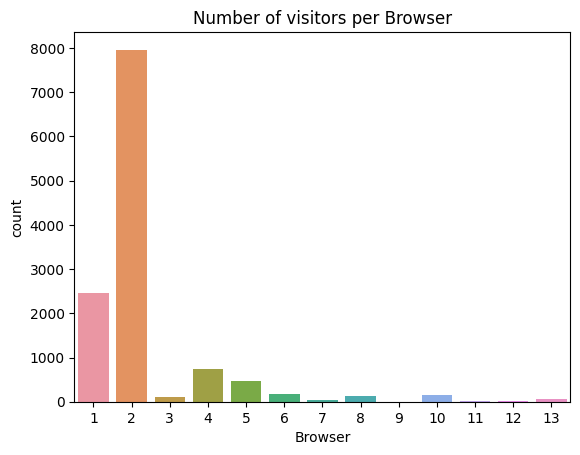

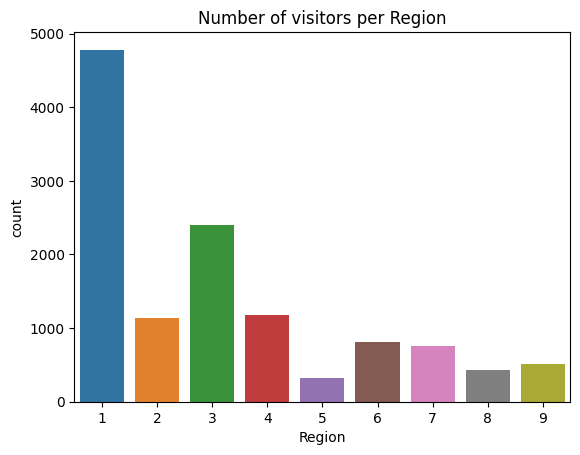

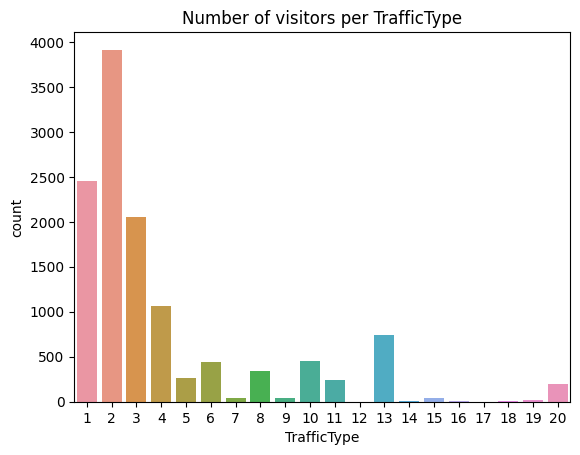

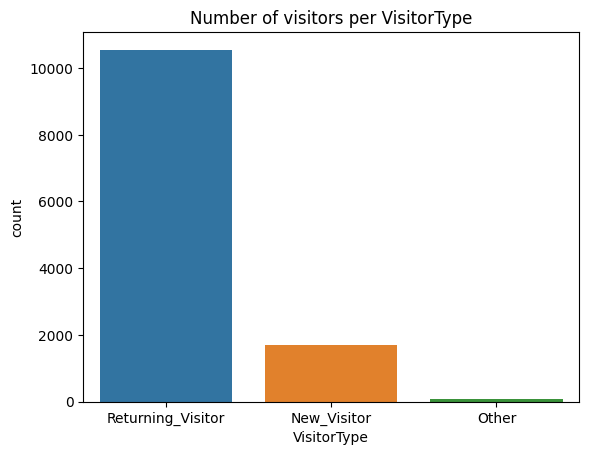

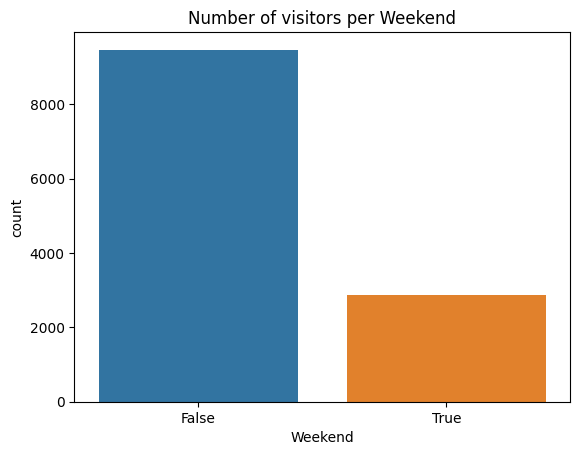

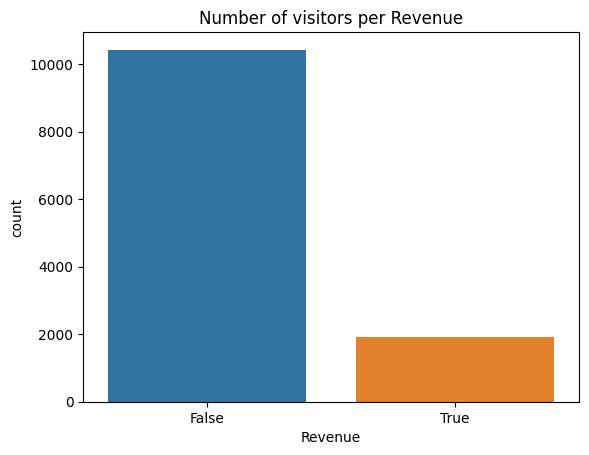

In [10]:
categorical_variables=['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

for categorical_variable in categorical_variables:
    seaborn.countplot(data=dataFrame,x=categorical_variable)
    pyplot.title(f'Number of visitors per {categorical_variable}')
    pyplot.show()

## 1.3. Análisis bivariante

A continuación, para conocer el comportamiento de las variables cualitativas frente a la variable objetivo **Revenue**, se presentan los siguientes gráficos.

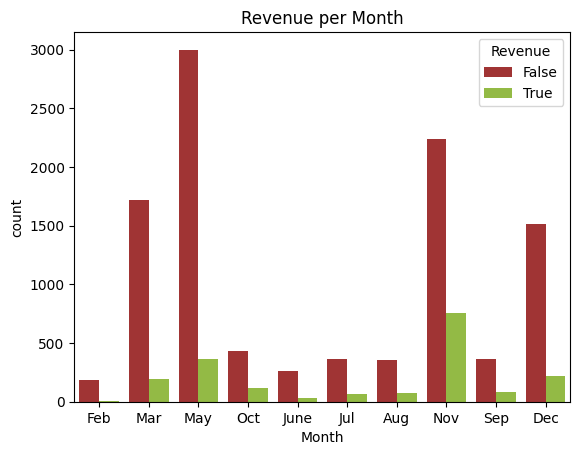

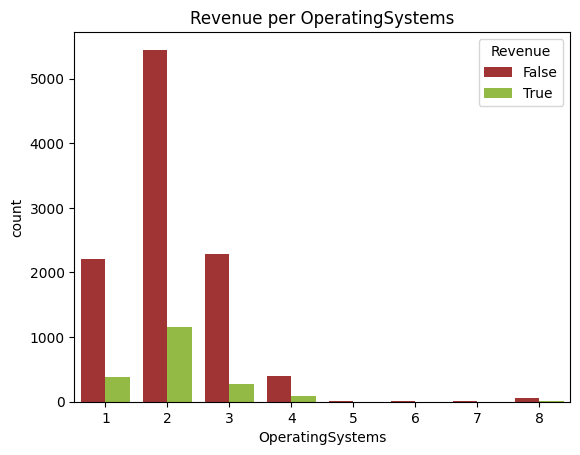

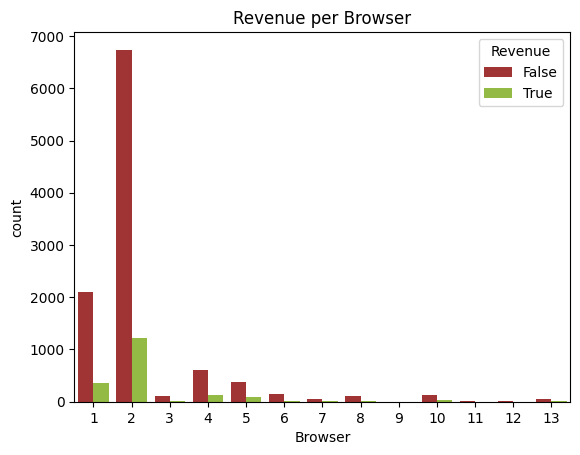

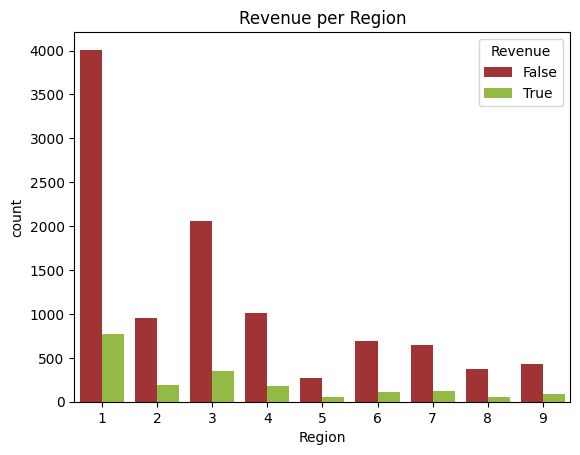

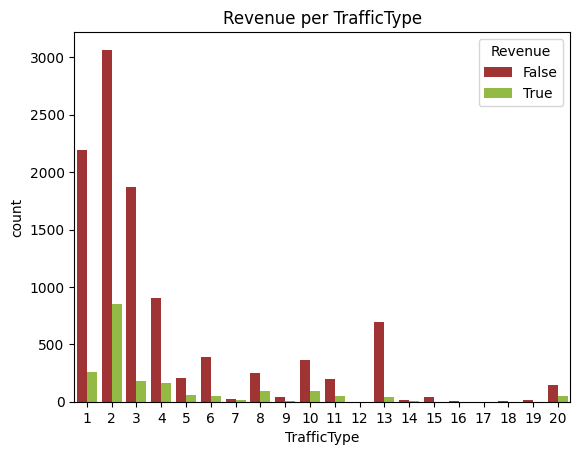

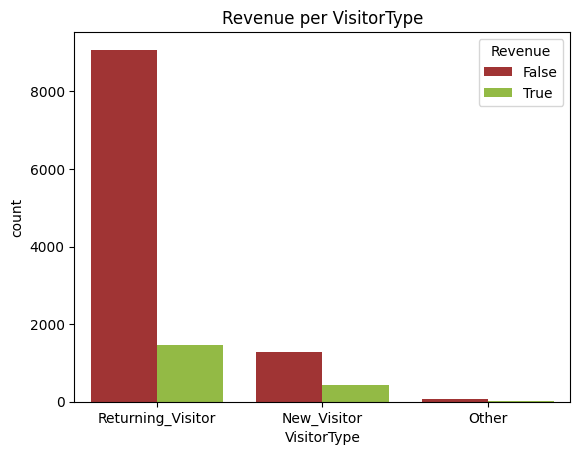

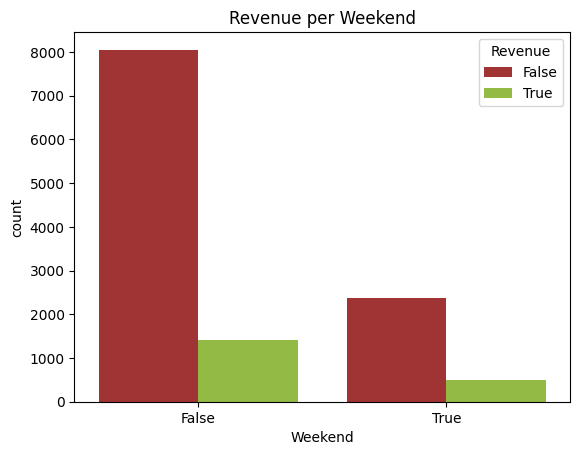

In [11]:
for categorical_variable in categorical_variables:
    if categorical_variable != 'Revenue':
        seaborn.countplot(data=dataFrame,x=categorical_variable, hue='Revenue', palette={True:'yellowgreen', False:'firebrick'})
        pyplot.title(f'Revenue per {categorical_variable}')
        pyplot.show()

También se ha realizado un análisis de la variable 'SpecialDay' frente a la variable objetivo.
Este análisis no se efectúa con el resto de las variables numéricas dada la amplitud de valores de las mismas, como se ha comprobado en los gráficos anteriores.

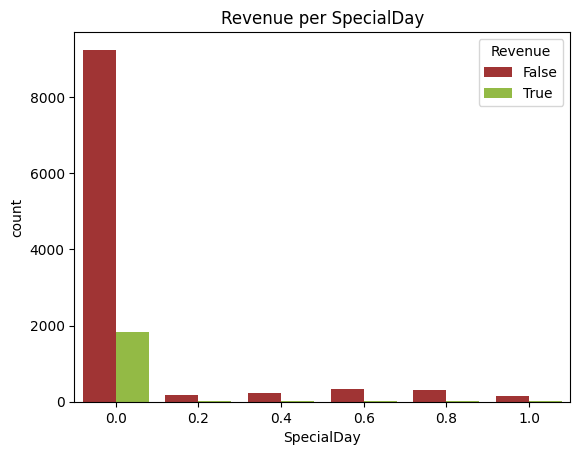

In [12]:
seaborn.countplot(data=dataFrame,x='SpecialDay',hue='Revenue', palette={True:'yellowgreen', False:'firebrick'})
pyplot.title(f'Revenue per SpecialDay')
pyplot.show()

De las gráficas presentadas, destacamos los siguientes datos:
- El mes con mayor número de visitas en la página web es Mayo, seguido del mes de Noviembre.


- En general, la mayor parte de las vistas a la web no finalizan con una compra.


- En relación con los datos anteriores, el mes con mayor número de compras es Noviembre y Mayo ocupa el segundo lugar. De este modo, aunque en Mayo más personas visitan la web que en Noviembre, en este último mes más visitas finalizan con compra.


- La mayoría de las personas que visitan la web y que realizan una compra son quienes han accedido en alguna ocasión anterior a la página web, es decir, no son nuevos visitantes.


- La mayor parte de las compras online se producen entre semana, no durante los fines de semana.


- Las personas no realizan más visitas ni más compras en momentos cercanos a días que se consideran especiales.

## 2. Limpieza de datos

## 2.1. Valores nulos

Comprobamos posibles valores nulos del data frame.

In [13]:
print('Número de datos nulos por columna en el dataframe')
print()
print(dataFrame.isnull().sum())

Número de datos nulos por columna en el dataframe

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


No hay valores faltantes o missing, por lo que no es necesario emplear la función *Dropna()*.

## 2.2. Valores duplicados

A continuación, se comprueban y descartan los posibles registros duplicados.

In [14]:
print('Eliminando filas con valores duplicados')
dataFrame = dataFrame.drop_duplicates()
print()
print(f'Número de filas sin registros duplicados: {dataFrame.shape[0]}')
print(f'Número de columnas: {dataFrame.shape[1]}')

Eliminando filas con valores duplicados

Número de filas sin registros duplicados: 12205
Número de columnas: 18


Como se aprecia, existen registros duplicados ya que el número de valores iniciales, 12330, ha descendido a 12205.

## 2.3. Valores atípicos

Por último, para verificar la calidad del dato es importante considerar los valores atípicos, cuyo tamaño es grande a la luz de los gráficos 'boxplot' presentados anteriormente.


Se puede observar que las variables *SpecialDay*, *Informational*, *Informational_duration* y *PageValues* no tienen ninguna distribución y si eliminamos sus valores atípicos, no quedarán valores en ellas. Por eso, se aplicará el tratamiento de valores atípicos a todas las variables numéricas, excepto en las anteriores.

In [15]:
print('Eliminando filas con valores atípicos')
numerical_columns = ['Administrative',
                     'Administrative_Duration',
                     'ProductRelated',
                     'ProductRelated_Duration',
                     'BounceRates',
                     'ExitRates']

Q1 = dataFrame[numerical_columns].quantile(0.25)
Q3 = dataFrame[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

dataFrame_cleaned = dataFrame[~((dataFrame[numerical_columns] < (lower_limit)) | (dataFrame[numerical_columns] > (upper_limit))).any(axis=1)]

print()
print(f'Número de filas sin valores atípicos: {dataFrame_cleaned.shape[0]}')
print(f'Número de columnas: {dataFrame.shape[1]}')

Eliminando filas con valores atípicos

Número de filas sin valores atípicos: 8352
Número de columnas: 18


## 3. Formatear

A continuación, transformamos las variables categóricas en numéricas para que estos datos no sean malinterpretados por los algoritmos de aprendizaje automático que se presentarán a continuación.

Primero, hacemos una lista de las variables categóricas.

In [16]:
dataFrame_cleaned.select_dtypes(exclude=['number']).columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [17]:
label_encoder = LabelEncoder()

En segundo lugar, se asigna un valor numérico único a cada categoría de las anteriores variables.

### Clase_Month

In [18]:
dataFrame_cleaned['Month'].value_counts()

Month
May     2267
Nov     1894
Mar     1426
Dec     1232
Oct      376
Sep      317
Jul      280
Aug      273
June     174
Feb      113
Name: count, dtype: int64

En este caso, cambiamos los valores de la variable 'Month' a través de un mapeo de valores en función del orden que ocupan los meses.

In [19]:
dataFrame_cleaned['Month'] = dataFrame_cleaned['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,
                                                             'June':6,'Jul':7,'Aug':8,'Sep':9,
                                                             'Oct':10,'Nov':11,'Dec':12})

### VisitorType

In [20]:
dataFrame_cleaned['VisitorType'].value_counts()

VisitorType
Returning_Visitor    6839
New_Visitor          1457
Other                  56
Name: count, dtype: int64

In [21]:
dataFrame_cleaned.VisitorType= label_encoder.fit_transform(dataFrame_cleaned.VisitorType.values)

### Weekend y Revenue

Vamos a proceder a cambiar los valores de otra manera en el caso de las variables restantes, de naturaleza booleana.

In [22]:
boolean_variables=['Weekend', 'Revenue']

for boolean_variable in boolean_variables:
    encoder = LabelEncoder()
    encoder.fit(dataFrame_cleaned[boolean_variable])
    print('Column:', boolean_variable)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('')
    dataFrame_cleaned[boolean_variable] = label_encoder.fit_transform(dataFrame_cleaned[boolean_variable])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]

Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]



Comprobamos si hay más tipos no numéricos.

In [23]:
dataFrame_cleaned.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,0,0
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,2,1,1,3,3,2,0,0
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.0,0.4,2,1,1,4,3,2,0,0


## Division en features X + target Y

In [24]:
# División en features X + target Y

X = dataFrame_cleaned.drop('Revenue', axis=1)
Y = dataFrame_cleaned['Revenue']

## 4. Eliminación de variables

In [25]:
dataFrame_cleaned.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000
mean,1.758860,41.343542,0.367098,22.267812,22.587883,804.377384,0.006619,0.027526,6.540682,0.056274,7.573994,2.114943,2.384938,3.197557,3.946360,1.644397,0.240541,0.160081
std,2.313537,57.904256,1.011163,103.362180,17.747296,729.378055,0.010148,0.018705,20.215426,0.190780,3.428456,0.924633,1.758481,2.428083,3.846223,0.760340,0.427438,0.366704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,241.000000,0.000000,0.013131,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,0.000000,17.000000,577.625000,0.000000,0.023529,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,3.000000,68.400000,0.000000,0.000000,31.000000,1166.841428,0.010811,0.038889,0.000000,0.000000,11.000000,2.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,10.000000,236.250000,16.000000,2252.033333,83.000000,3401.050687,0.041667,0.095238,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


La decisión de descartar ciertas variables del conjunto de datos depende de los objetivos de análisis específicos y la relevancia de cada variable para esos objetivos. Para ayudarnos en esta tarea, decidimos calcular la matriz de correlación para analizar las dependencias entre las variables y la correlación entre las variables independientes con la dependiente o target.

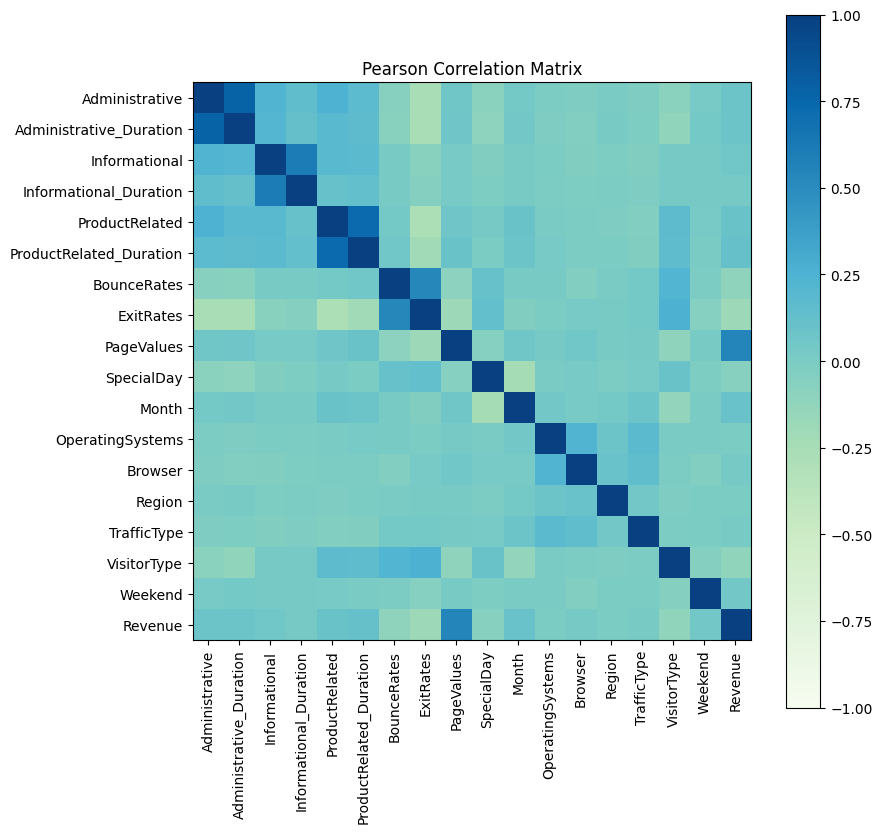

In [26]:
correlations_matrix = dataFrame_cleaned.corr(method='pearson')
n_ticks = len(dataFrame_cleaned.columns)
pyplot.figure(figsize=(9, 9))
pyplot.xticks(range(n_ticks), dataFrame_cleaned.columns, rotation='vertical')
pyplot.yticks(range(n_ticks), dataFrame_cleaned.columns)
pyplot.colorbar(pyplot.imshow(correlations_matrix, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=pyplot.get_cmap('GnBu')))
_ = pyplot.title('Pearson Correlation Matrix')

In [27]:
correlations_target = correlations_matrix.values[ -1, : -1]
inverses_index =  abs(correlations_target[ : ]).argsort()[ : : -1]
dictionary = {}
for name, correlation in zip(X.columns[inverses_index], list(correlations_target[inverses_index])):
    dictionary[name] = correlation
pandas.DataFrame.from_dict(dictionary, orient='index', columns=['Correlación con la target'])

,Correlación con la target
PageValues,0.541343
ExitRates,-0.190599
VisitorType,-0.122640
ProductRelated_Duration,0.115783
BounceRates,-0.113496
Month,0.097682
ProductRelated,0.093453
Administrative_Duration,0.073408
Administrative,0.072183
SpecialDay,-0.066820


La variable *PageValues* es aquella que mayor correlación tiene con la variable target en comparación con el resto.

Por otro lado, comprobamos que las variables *Administrative* y *Administrative_Duration*, *Informational* e *Informational_Duration*, *ProductRelated* y *ProductRelated_Duration* están muy correladas entre sí, así que eliminamos la primera de cada par. Estas columnas se consideran redundantes y no útiles para el análisis.

Eliminamos las variables mencionadas y con ello volvemos a definir las variables independientes o features (X), sin olvidarnos de excluir la variable dependiente o target (Y) 'Revenue'.

In [28]:
X = dataFrame_cleaned.drop(['Revenue','Administrative', 'Informational', 'ProductRelated'], axis=1)

## 5. Estandarización de los datos

Existen modelos que parten de la hipótesis de que los datos son centrados y, por tanto, se necesita estandarizar. Esta suele ser una buena práctica porque generalmente no perjudica.

In [29]:
standardization = StandardScaler()
X_standardized = standardization.fit_transform(X)

In [30]:
X_standardized.shape

(8352, 14)

Comprobamos, tras las acciones realizadas, el número de observaciones anteriormente mencionado y también el número final de variables independientes con las que se va a trabajar (14).

## 6. Dividir los datos en train y en test

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=0)

## 7. Modelo lineal: regresión logística

### Optimización de C y class_weight utilizando GridSearch

In [32]:
model_logisticRegression = LogisticRegression()
parameters_logisticRegression = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 
              "class_weight":['balanced', None]}

In [33]:
GridSearch_logisticRegression = GridSearchCV(model_logisticRegression,
                     param_grid = parameters_logisticRegression, cv = 5, scoring='roc_auc')
GridSearch_logisticRegression.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [34]:
print(GridSearch_logisticRegression.best_params_, "\nROC AUC: {}".format(round(GridSearch_logisticRegression.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.91


In [35]:
dataFrame_search = pandas.DataFrame.from_dict(GridSearch_logisticRegression.cv_results_)

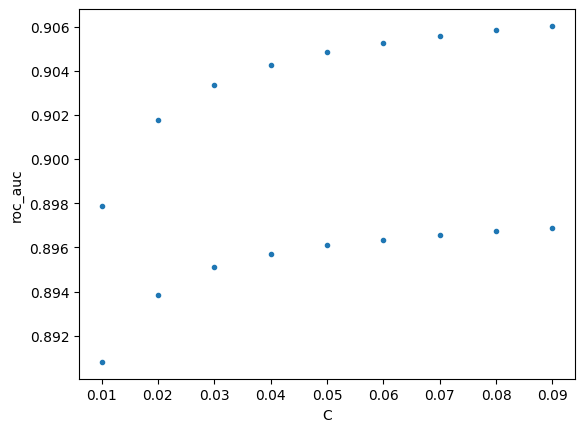

In [36]:
pyplot.xlabel('C')
pyplot.ylabel('roc_auc')
_ = pyplot.plot(dataFrame_search['param_C'], dataFrame_search['mean_test_score'], '.')

### Análisis del modelo con el mejor alpha

En este paso nos quedamos con los mejores parámetros obtenidos en el paso anterior.

In [37]:
logistic_regression =  LogisticRegression(C=GridSearch_logisticRegression.best_params_['C'],
                              class_weight=GridSearch_logisticRegression.best_params_['class_weight'])

Ajusto a todos los datos de entrenamiento.

In [38]:
logistic_regression.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

Una vez elegido y optimizado el modelo, es el momento de incluir el conjunto de Test para predecir cómo se comporta el modelo en nuevos datos. 

In [39]:
y_test_pred_prob_logisticRegression = logistic_regression.predict_proba(X_test)
y_test_pred_prob_positive_logisticRegression = y_test_pred_prob_logisticRegression[numpy.where(Y_test == 1)[0]]
y_test_pred_prob_negative_logisticRegression = y_test_pred_prob_logisticRegression[numpy.where(Y_test == 0)[0]]

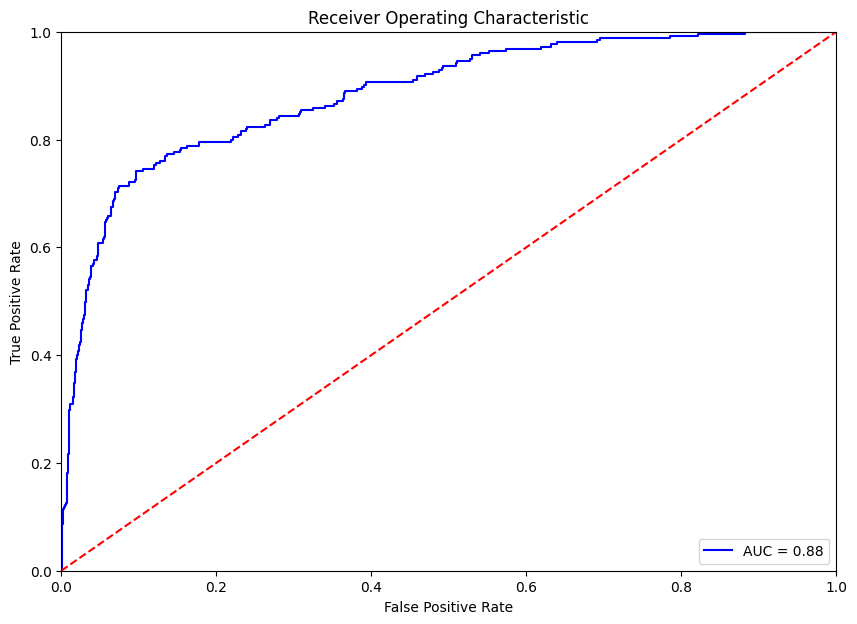

In [40]:
predictions_logisticRegression = y_test_pred_prob_logisticRegression[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions_logisticRegression)
roc_auc = metrics.auc(fpr, tpr)

pyplot.figure(figsize=(10,7))
pyplot.title('Receiver Operating Characteristic')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
pyplot.legend(loc = 'lower right')
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

## 8. Modelos de redes neuronales

In [41]:
# Definición del modelo

model_neuralNetwork = Sequential()
model_neuralNetwork.add(Dense(24, input_dim=14, activation='relu'))
model_neuralNetwork.add(Dense(12, activation='relu'))
model_neuralNetwork.add(Dense(6, activation='relu'))
model_neuralNetwork.add(Dense(1, activation='sigmoid'))

In [42]:
# Compilación del modelo

model_neuralNetwork.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ajuste del modelo a los datos

model_neuralNetwork.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
669/669 [==============================] - 0s 383us/step - loss: 0.3629 - accuracy: 0.8581
Epoch 2/100
669/669 [==============================] - 0s 369us/step - loss: 0.2608 - accuracy: 0.9000
Epoch 3/100
669/669 [==============================] - 0s 374us/step - loss: 0.2458 - accuracy: 0.9057
Epoch 4/100
669/669 [==============================] - 0s 365us/step - loss: 0.2381 - accuracy: 0.9084
Epoch 5/100
669/669 [==============================] - 0s 369us/step - loss: 0.2323 - accuracy: 0.9093
Epoch 6/100
669/669 [==============================] - 0s 369us/step - loss: 0.2279 - accuracy: 0.9100
Epoch 7/100
669/669 [==============================] - 0s 383us/step - loss: 0.2262 - accuracy: 0.9124
Epoch 8/100
669/669 [==============================] - 0s 371us/step - loss: 0.2230 - accuracy: 0.9126
Epoch 9/100
669/669 [==============================] - 0s 368us/step - loss: 0.2209 - accuracy: 0.9118
Epoch 10/100
669/669 [==============================] - 0s 365us/step - l

In [43]:
# Evaluación del modelo

_, accuracy = model_neuralNetwork.evaluate(X_train, Y_train)

print('Accuracy: %.2f' % (accuracy*100))

209/209 [==============================] - 0s 285us/step - loss: 0.1520 - accuracy: 0.9368
Accuracy: 93.68


In [44]:
# Predicciones en test

y_test_pred_prob_neuralNetwork = model_neuralNetwork.predict(X_test)
y_test_pred_prob_neuralNetwork = y_test_pred_prob_neuralNetwork[:,0]

predictions_neuralNetwork = numpy.where(y_test_pred_prob_neuralNetwork > 0.5, 1, 0) # Convertir la probabilidad a una salida binaria 0-1

53/53 [==============================] - 0s 323us/step


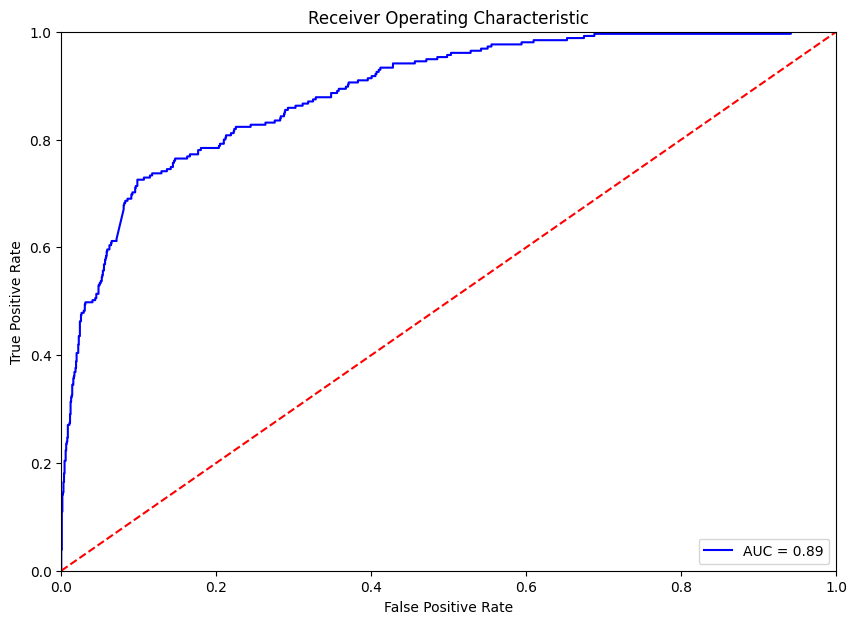

In [45]:
# Curva ROC

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred_prob_neuralNetwork)
roc_auc = metrics.auc(fpr, tpr)

pyplot.figure(figsize=(10,7))
pyplot.title('Receiver Operating Characteristic')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
pyplot.legend(loc = 'lower right')
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

In [46]:
# Evaluación del modelo

_, accuracy = model_neuralNetwork.evaluate(X_test, Y_test)

print('Accuracy: %.2f' % (accuracy*100))

53/53 [==============================] - 0s 365us/step - loss: 0.3313 - accuracy: 0.8857
Accuracy: 88.57


## 9. Otro modelo de clasificación: Random Forest

In [47]:
model_randomForest = RandomForestClassifier()
parameters_randomForest = {'n_estimators': [10, 50, 100],
                           'max_depth': [10, 15],
                           'min_samples_leaf': [2, 3],
                           'min_samples_split': [2, 4]}

In [48]:
# Optimización utilizando GridSearch

GridSearch_randomForest = GridSearchCV(model_randomForest,
                                       param_grid=parameters_randomForest, verbose = 1) #cv=3, n_jobs=-1)

GridSearch_randomForest.fit(X_train,Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [49]:
# Obtención de mejores parámetros

print(GridSearch_randomForest.best_params_, "\nROC AUC: {}".format(round(GridSearch_randomForest.best_score_,2)))

{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100} 
ROC AUC: 0.91


In [50]:
# Entrenamiento con los mejores parámetros

model_randomForest = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_leaf = 3, min_samples_split = 2, random_state = 101)

model_randomForest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=101)

In [51]:
# Predicciones en test

y_test_pred_prob_randomForest = model_randomForest.predict_proba(X_test)
y_test_pred_prob_positive_randomForest = y_test_pred_prob_randomForest[numpy.where(Y_test == 1)[0]]
y_test_pred_prob_negative_randomForest = y_test_pred_prob_randomForest[numpy.where(Y_test == 0)[0]]

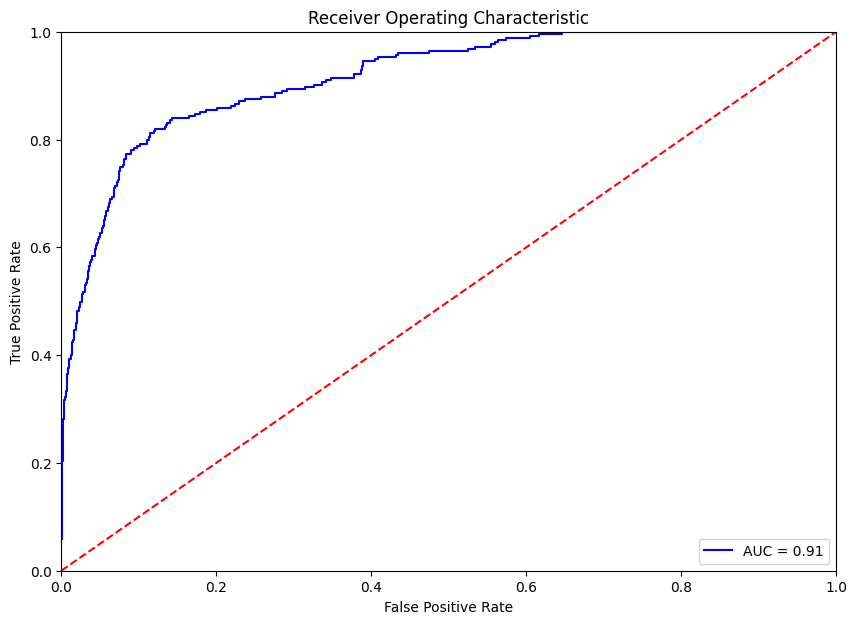

In [52]:
# Curva ROC

predictions_randomForest = y_test_pred_prob_randomForest[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions_randomForest)
roc_auc = metrics.auc(fpr, tpr)

pyplot.figure(figsize=(10,7))
pyplot.title('Receiver Operating Characteristic')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
pyplot.legend(loc = 'lower right')
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

## 10. Elegir el mejor modelo

Según el enunciado inicial, se debe elegir el mejor modelo de los tres según la métrica de la curva ROC. Por eso, recordamos los valores obtenidos en el área bajo dicha curva en los tres modelos desarrollados:

1. Regresión logística. AUC: 0.88.

2. Redes neuronales. AUC: 0.89.

3. Random forest. AUC: 0.91.

De acuerdo con esto, el modelo de clasificación que permite predecir con mayor precisión la probabilidad de lo que los clientes realicen compras en la web es el modelo de Random forest.

## 11. Umbralización de las predicciones

El último apartado apunta que se deben umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC. Procedemos a ello en el mejor modelo que hemos señalado, el Random forest.

Es preciso elegir el umbral para separar nuestros resultados, que son valores continuos en una opción binaria de No o Sí (0 o 1) sobre la probabilidad de compras.

El umbral se establece en 0.4 porque es el que ofrece mejor rendimiento tras probar con otros valores.

In [91]:
threshold_randomForest = 0.4
y_pred_new_threshold_randomForest = 1*(y_test_pred_prob_randomForest[:, 1] > threshold_randomForest)

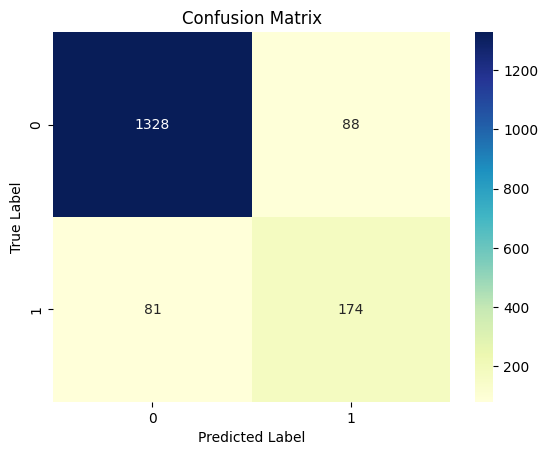

In [92]:
confusionMatrix_randomForest = metrics.confusion_matrix(Y_test, y_pred_new_threshold_randomForest)

seaborn.heatmap(confusionMatrix_randomForest, annot=True, fmt='d', cmap='YlGnBu')
pyplot.title('Confusion Matrix')
pyplot.xlabel('Predicted Label')
pyplot.ylabel('True Label')
pyplot.show()

In [93]:
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_pred_new_threshold_randomForest),2)))  
print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_pred_new_threshold_randomForest),2)))
print(u"Precision\t{}".format(round(metrics.precision_score(Y_test, y_pred_new_threshold_randomForest),2)))


Accuracy	0.9
Sensitivity	0.68
Precision	0.66
